In [1]:
import numpy as np
import onnxruntime as ort
from helper import *
import time

In [2]:
# Load priors for SSD detection
loaded_priors = np.load('priors.npy')

# Initialize the detection ONNX model session
detection_session = ort.InferenceSession("SSD300 int8.onnx")
detection_input_name = detection_session.get_inputs()[0].name
detection_output_names = [output.name for output in detection_session.get_outputs()]

In [3]:
# ── 0) Your “alphabet” in the exact same order you trained with ───────────────
#    (i.e. the softmax channels 0…C−2 map to these chars; C−1 is the blank)
char_list = [' ', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
idx_to_char = char_list
blank_id    = len(idx_to_char)    # softmax channel C−1


# ── 1) ONNX‐Runtime session ────────────────────────────────────────────────────
ort_session = ort.InferenceSession(
    "cnn-lstm-ctc (inference only) fp32.onnx",
    providers=["CPUExecutionProvider"]
)

['257.']


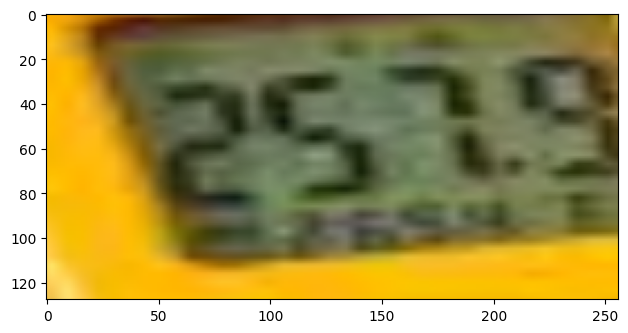

184.10491943359375


In [8]:
image_path = 'extra images/images.jpeg'

start = time.time()
crop = detect_crop(image_path, loaded_priors,
                                         detection_session, detection_input_name, detection_output_names)

visualize_predictions_onnx_from_folder(crop,ort_session,idx_to_char, blank_id,plot=True)
end = time.time()

print((end-start)*1000)